# What is Symbolic Computation?

Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form.

## Importing Libraries

In [1]:
from sympy import *
import math
import time
init_printing(use_unicode = True)  ## This line will make all printing as pretty

In [92]:
global evalf
evalf=False
global simplify
simplify=False

## Examples

### Roots

In [2]:
math.sqrt(3)    ##try 8, 3

In [3]:
sqrt(3)

In [125]:
with evaluate(False):
    a=2/3

In [126]:
a

In [111]:
cosh(20).evalf()

### Symbolic Calculations

All algebraic operations can be made

In [4]:
x, y = symbols('x y')
expr1 = x + 2 * y + (y ** 2) / x
expr1

#### Be careful!!!

In [5]:
y, x = symbols('x y')
expr1 = x + 2 * y + (y ** 2) / x
expr1

In [6]:
expr2 = expr1 * x  ##it will keep as below
expr2

In [7]:
## expand command of sympy
expand(expr2)

In [8]:
## factor command of sympy
factor(expr2) 

In [9]:
expand((x + 1) ** 10)

In [10]:
factor(x**20-1)

## The Power of Symbolic Computation

The real power of a symbolic computation system such as SymPy is the ability to do all sorts of computations symbolically. SymPy can simplify expressions, compute derivatives, integrals, and limits, solve equations, work with matrices, and much, much more, and do it all symbolically. It includes modules for plotting, printing (like 2D pretty printed output of math formulas, or $LATEX$), code generation, physics, statistics, combinatorics, number theory, geometry, logic, and more. Here is a small sampling of the sort of symbolic power SymPy is capable of, to whet your appetite.

In [11]:
x, t, z = symbols('x t z')

#### Writing the expressions: $e^{x} \sin{\left (x \right )}$

In [12]:
expr1 = sin(x) * exp(x * z)
expr1

#### Derivatives: $\frac{d}{d x}\left(e^{x} \sin{\left (x \right )}\right)$

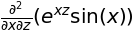

In [13]:
## Derivative displays the operation, diff calculates it
Derivative(expr1, x, z)
#expr2 = diff(expr1, x)
#expr2

In [14]:
_.doit()

#### Integrals: $\int e^{x} \sin{\left (x \right )} + e^{x} \cos{\left (x \right )}\, dx$

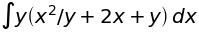

In [15]:
## Integral displays the operation, integrate calculates it
Integral(expr2, x)
#integrate(expr2, x)

#### Definite Integral: $\int_{-\infty}^{\infty} \sin{\left (x^{2} \right )}\, dx$

In [16]:
#Integral(sin(x ** 2), (x, -oo, oo))
integrate(sin(x ** 2), (x, -oo, oo))

#### Limits: $\lim_{x \to 0}\left(\frac{1}{x} \sin{\left (x \right )}\right)$

In [17]:
## Limit displays the limit of an expression and displays the direction of the limit from right by default; limit calculates it
#Limit(sin(x) / x, x, 0)
limit(1 / x, x, 0)

#### ** .doit() ** function

In [18]:
## but it calculates correctly
_.doit()

### Solving Equations as $x^{2} - 4 = 0$

How to assign an equation?

In [19]:
x ** 2 - 4 == 0

False

In [20]:
Eq(x ** 2 - 4)

In [21]:
## The coomand 'solve' finds the root(s) of the first input
solve(x ** 2 - 4,x)

### ODE Solver

Solve $\frac{d^{2}}{d t^{2}}  y{\left (t \right )} - y{\left (t \right )} = e^{t}$

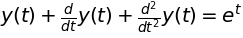

In [22]:
y = Function('y')
Eq1 = Eq(y(t).diff(t, t) + y(t).diff(t) + y(t), exp(t))
Eq1

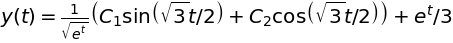

In [23]:
dsolve(Eq1, y(t))

## Matrices

In [24]:
M = Matrix([[1, 2], [2, 2]])
M

⎡1  2⎤
⎢    ⎥
⎣2  2⎦

In [25]:
N = M.inv()
N

⎡-1   1  ⎤
⎢        ⎥
⎣1   -1/2⎦

In [26]:
M * N  ## or you can also use M.multiply(N)

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [27]:
M.multiply(N)

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [28]:
M.eigenvals()

In [29]:
M.eigenvects()

⎡⎛            ⎡⎡   -2    ⎤⎤⎞  ⎛              ⎡⎡   -2    ⎤⎤⎞⎤
⎢⎜            ⎢⎢─────────⎥⎥⎟  ⎜              ⎢⎢─────────⎥⎥⎟⎥
⎢⎜3   √17     ⎢⎢  √17   1⎥⎥⎟  ⎜  √17   3     ⎢⎢  1   √17⎥⎥⎟⎥
⎢⎜─ + ───, 1, ⎢⎢- ─── - ─⎥⎥⎟, ⎜- ─── + ─, 1, ⎢⎢- ─ + ───⎥⎥⎟⎥
⎢⎜2    2      ⎢⎢   2    2⎥⎥⎟  ⎜   2    2     ⎢⎢  2    2 ⎥⎥⎟⎥
⎢⎜            ⎢⎢         ⎥⎥⎟  ⎜              ⎢⎢         ⎥⎥⎟⎥
⎣⎝            ⎣⎣    1    ⎦⎦⎠  ⎝              ⎣⎣    1    ⎦⎦⎠⎦

## Substitutions: expression.subs(old,new)

In [65]:
expr = acos(5)
expr

In [31]:
## works as following: .subs(old, new)
expr.subs(x, 0)

In [32]:
expr.subs(x, t - z)

## Converting strings into SymPy expressions: sympify(string)

In [33]:
str_expr = 'x ** 2 + exp(x ** 2)'
str_expr

'x ** 2 + exp(x ** 2)'

In [34]:
expr = sympify(str_expr)
expr

In [35]:
expr.subs(x, 1)

## Evaluation: .evalf()

In [36]:
sqrt(3).evalf()

In [37]:
pi.evalf(10)

## Converting from SymPy to NumPy: lambdify(variable, expression, type)

In [38]:
import numpy as np
import time

In [39]:
a = np.arange(pow(10,7))
f = lambdify(x, sin(x), 'math')
g = lambdify(x, sin(x), 'numpy')
a

array([      0,       1,       2, ..., 9999997, 9999998, 9999999])

In [40]:
g(a)

array([ 0.        ,  0.84147098,  0.90929743, ..., -0.28830516,
        0.64996899,  0.99066465])

In [41]:
print([f(i) for i in a])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### TIME MATTERS!

In [42]:
start = time.time()
print(np.sum(g(a)))
end = time.time()
t1 = end - start
print(t1)

1.5353436153504596
0.39705824851989746


In [43]:
start = time.time()
print(sum([f(i) for i in a]))
end = time.time()
t2 = end - start
print(t2)

1.5353436153504942
3.553454637527466
